# Problem klas niezbalansowanych 

### Przykłady:  
* fraudy na kartach kredytowych
* analiza żywotności urządzeń
* analizy medyczne (wykrywanie chorób)
* rekomendacja reklam

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
from help_plot import plot_decision_regions    

### Co się dzieje w praktyce? 

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [14]:
SIZE_1 = 100
SIZE_2 = 100
C_1 = np.array([[0, -0.23], [0.83, 0.93]])
C_2 = C_1 
M1 = np.array([0.25, 0.5])
M2 = M1 + np.array([0.28, -0.34])*1.5
X_0 = np.random.multivariate_normal(M1, C_1, SIZE_1)
X_1 = np.random.multivariate_normal(M2, C_2, SIZE_2)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


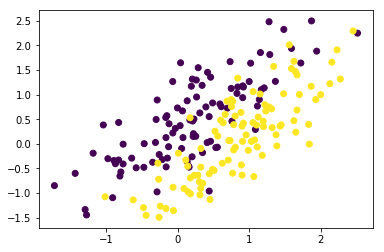

In [15]:
X_large = np.vstack([X_0, X_1])
y_large = np.array([0]*SIZE_1 + [1]*SIZE_2)

plt.scatter(X_large[:, 0], X_large[:, 1], c=y_large)
plt.show()

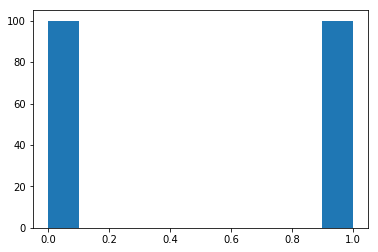

In [16]:
plt.hist(y_large)
plt.show()

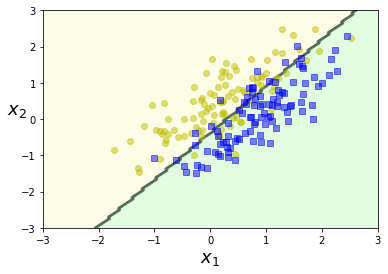

In [17]:
model_large = LogisticRegression()
model_large.fit(X_large, y_large)
plot_decision_boundary(model_large, X_large, y_large, axes=[-3, 3, -3, 3])
plt.show()

In [18]:
print(SIZE_2)
SMALLER_SIZE=20
print(SMALLER_SIZE)
indices = np.random.choice(SIZE_2, size=SMALLER_SIZE, replace=False)

100
20


In [19]:
X_smaller = np.vstack([X_0, X_1[indices, :]])
y_smaller = np.array([0]*SIZE_1 + [1]*SMALLER_SIZE)

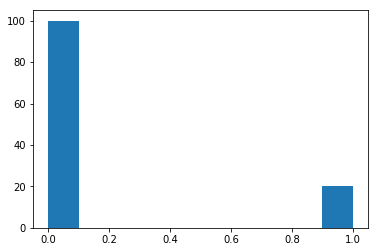

In [20]:
plt.hist(y_smaller)
plt.show()

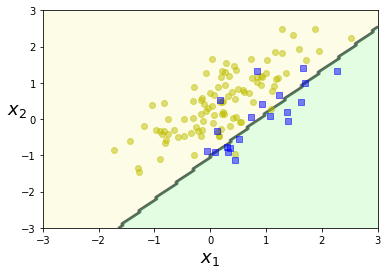

In [21]:
model_smaller = LogisticRegression()
model_smaller.fit(X_smaller, y_smaller)
plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plt.show()

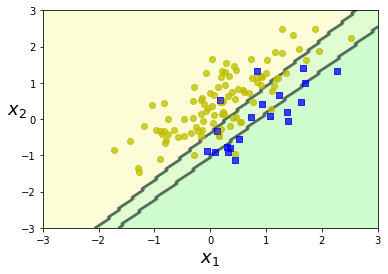

In [22]:
plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_large, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plt.show()

Widać, że pomimo tego, że dane pochodzą z tego samego rozkładu co wcześniej, bardzo mocno zmieniła się granica decyzyjna, i w praktyce nie rozdziela już obu rozkładów tak dobrze jak przy zbalansowanych klasach.

### Co możemy z tym zrobić? 

#### 1. Undersampling 

W sytuacji, kiedy jednej klasy jest więcej niż drugiej, możemy losowo usunąć obserwacje z liczniejszej klasy, sprowadzając wtedy problem do sytuacji kiedy obie grupy są równoliczne.  

In [23]:
X_smaller_0 = X_smaller[y_smaller == 0, :]
X_smaller_1 = X_smaller[y_smaller == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

(100, 2) (20, 2)
(40, 2) (40,)


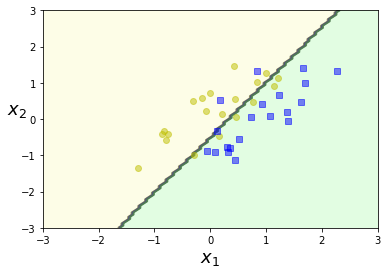

In [24]:
model_undersampled = LogisticRegression()
model_undersampled.fit(X_undersampled, y_undersampled)
plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])
plt.show()

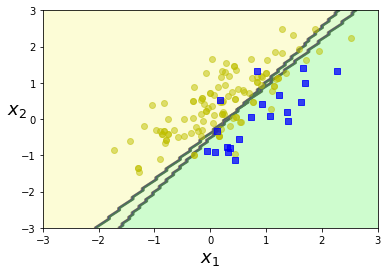

In [25]:
# plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_large, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])

plt.show()

#### 2. Oversampling 

Drugą techniką jest sztuczne zwiększenie liczności jednej z klas poprzez dopróbkowanie obserwacji. Dzięki temu wyrównujemy wielkości obu klas, ale w przeciwieństwie do poprzedniej strategii, nie tracimy informacji.

In [26]:
X_oversampled_1 = np.vstack([X_smaller_1]*5)

In [27]:
X_oversampled = np.vstack([X_smaller_0, X_oversampled_1])

y_oversampled = np.array([0]*X_smaller_0.shape[0] + [1]*X_oversampled_1.shape[0]) 

print(X_oversampled.shape, y_oversampled.shape)

(200, 2) (200,)


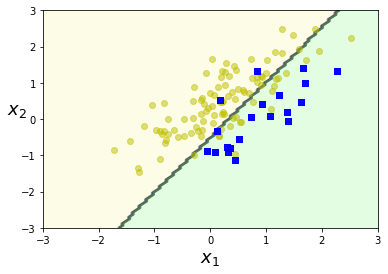

In [28]:
model_oversampled = LogisticRegression()
model_oversampled.fit(X_oversampled, y_oversampled)
plot_decision_boundary(model_undersampled, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
plt.show()

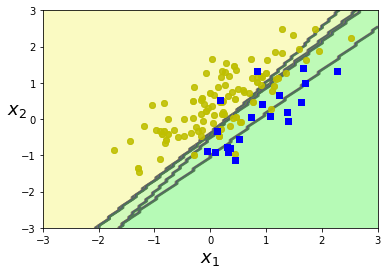

In [32]:
plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_large, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_oversampled, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
plt.show()

#### 3. Ważona funkcja straty 

Główną przyczyną takiego zachowania modelu jest to, że wartości funkcji straty dla obserwacji z mniej licznej klasy mają proporcjonalnie mniejszy wkład w jej wartość, niż obserwacje z bardziej licznej klasy. Dzięki temu klasyfikator "uczy się", że nie ma sensu dopasowywać się do tych mniej licznych obserwacji, bo zysk z tego będzie niewielki. Możemy więc nadać każdemu punktowi odpowiednią wagę (zależną od klasy) tak, aby zrównoważyło to braki w liczności.

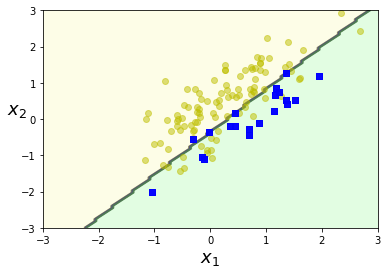

In [25]:
model_weighted = LogisticRegression(class_weight={0:1, 1:5})
model_weighted.fit(X_smaller, y_smaller)

plot_decision_boundary(model_weighted, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
plt.show()

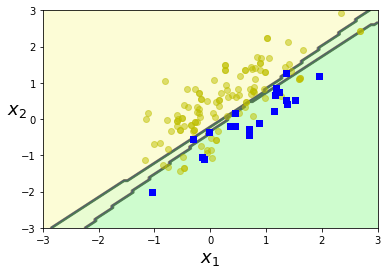

In [26]:
# plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
# plot_decision_boundary(model_large, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])
# plot_decision_boundary(model_oversampled, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
plot_decision_boundary(model_weighted, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
plt.show()

### Dobre rady - o czym warto pamiętać: 

* **dobór odpowiedniej metryki** - przy walidacji modelu dostaliśmy *accuracy* równe 99%. Czy model jest dobry? *Nie wiemy.* Jeśli klasy są mocno niezbalansowane (np. 99:1) to najprawdopodobniej model przypisał wszytki obserwacjom liczniejszą klasę. Lepiej używać metryk opartych o prawdopodobieństwa, a nie o klasy - na przykład AUC.  
* **warstwowa walidacja krzyżowa** - jeśli używamy walidacji krzyżowej, to warto pamiętać o tym, aby w każdej próbce były takie same proporcje między licznościami klas. W przeciwnym wypadku próbki mogą nie oddawać dobrze naszej całej próby, co z kolei doprowadzi do złej estymacji jakości modelu.
